<a href="https://colab.research.google.com/github/Matvezy/Regression-Line/blob/master/Regression_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matvei Popov for Code in. Linear Regression**

---
# Working with randomly generated dataset


Imports


In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import pandas as pd

Generating two random arrays for x cordinate and y cordinate

In [0]:

np.random.seed(101) 
tf.set_random_seed(101) 
#arrays 0-70
x = np.linspace(0, 70, 50) 
y = np.linspace(0, 70, 50) 
#adding noize
x += np.random.uniform(-4, 8, 50) 
y += np.random.uniform(-4, 8, 50) 
  
n = len(x) 

Defining variables, but not initializing them. Defining y predicted and cost, and model.

In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 800
# y predicted with y=ax+b
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Calculating error
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

Starting Session, initializing, learn

In [0]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initialize variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 100 == 0: 
            # Calculating the cost thru each iteration
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 100 : cost = 13.689359 W = 1.0155375 b = 1.2126147
Epoch 200 : cost = 13.55485 W = 1.01762 b = 1.0631037
Epoch 300 : cost = 13.447267 W = 1.0193709 b = 0.9373895
Epoch 400 : cost = 13.360709 W = 1.0208431 b = 0.8316863
Epoch 500 : cost = 13.290682 W = 1.022081 b = 0.74280757
Epoch 600 : cost = 13.233751 W = 1.0231218 b = 0.6680753
Epoch 700 : cost = 13.18726 W = 1.023997 b = 0.6052384
Epoch 800 : cost = 13.149146 W = 1.0247328 b = 0.5524057


Calculating predicitions and graphing

Training cost = 13.149146 Weight = 1.0247328 bias = 0.5524057 



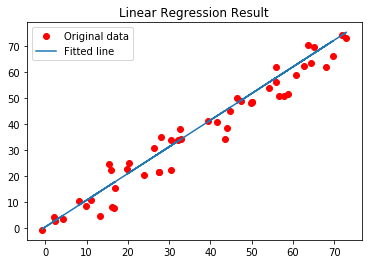

In [0]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

# **Working with csv dataset of salary-years of experience.**
Reading values from dataset 

In [0]:
url='https://raw.githubusercontent.com/Matvezy/Regression-Line/master/Salary_Data.csv'
dataset = pd.read_csv(url)
x=dataset['YearsExperience'].values
y=dataset['Salary'].values

Training on other dataset

In [0]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initialize variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 100 == 0: 
            # Calculating the cost thru each iteration
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 41856172.0 W = 12676.779 b = 3432.8462
Epoch 100 : cost = 37967612.0 W = 12477.362 b = 4814.209
Epoch 150 : cost = 34544370.0 W = 12290.061 b = 6110.445
Epoch 200 : cost = 31530500.0 W = 12114.291 b = 7326.8296
Epoch 250 : cost = 28877128.0 W = 11949.354 b = 8468.267
Epoch 300 : cost = 26541104.0 W = 11794.568 b = 9539.398
Epoch 350 : cost = 24484518.0 W = 11649.331 b = 10544.541
Epoch 400 : cost = 22673984.0 W = 11513.033 b = 11487.761
Epoch 450 : cost = 21080132.0 W = 11385.131 b = 12372.855
Epoch 500 : cost = 19677008.0 W = 11265.115 b = 13203.423


Displaying results

Training cost = 19677008.0 Weight = 11265.115 bias = 13203.423 



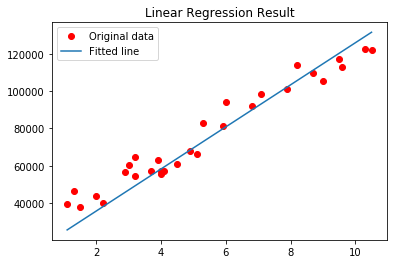

In [0]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 